In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
heart_disease=pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#check for null target values
heart_disease['target'].isna().sum()

0

No null values so go ahead

In [4]:
#split into features & label
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

In [5]:
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
#check for null if there for imputation
X.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

No null values in any col so go ahead

In [8]:
#split into train & test
np.random.seed(42)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
#Go to map and choose the model
#We get Linear SVC
from sklearn.svm import LinearSVC

#set seed
np.random.seed(42)

#Initialize
clf=LinearSVC()

#fit
clf.fit(X_train,y_train)

#evaluate
print(f'Acuuracy of Heart Disease Prediction with Linear SVC is {clf.score(X_test,y_test)*100:.2f}%')
LinearSVC_acc=clf.score(X_test,y_test)

Acuuracy of Heart Disease Prediction with Linear SVC is 86.89%


D:\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


As we see this is not working properly we look for other options in the map

In [10]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


We land up on KNN algo

In [25]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)

neighbors=np.arange(3,100,3)
acc={}
for i in neighbors:
    nbrs=KNeighborsClassifier(n_neighbors=i)
    nbrs.fit(X_train,y_train)
    acc[i]=nbrs.score(X_test,y_test)*100
    print(f'Accuracy of KNN with {i} as n_neighbors is {nbrs.score(X_test,y_test)*100:.2f}%')
    print()

Accuracy of KNN with 3 as n_neighbors is 65.57%

Accuracy of KNN with 6 as n_neighbors is 72.13%

Accuracy of KNN with 9 as n_neighbors is 68.85%

Accuracy of KNN with 12 as n_neighbors is 73.77%

Accuracy of KNN with 15 as n_neighbors is 68.85%

Accuracy of KNN with 18 as n_neighbors is 68.85%

Accuracy of KNN with 21 as n_neighbors is 70.49%

Accuracy of KNN with 24 as n_neighbors is 72.13%

Accuracy of KNN with 27 as n_neighbors is 72.13%

Accuracy of KNN with 30 as n_neighbors is 73.77%

Accuracy of KNN with 33 as n_neighbors is 70.49%

Accuracy of KNN with 36 as n_neighbors is 72.13%

Accuracy of KNN with 39 as n_neighbors is 68.85%

Accuracy of KNN with 42 as n_neighbors is 70.49%

Accuracy of KNN with 45 as n_neighbors is 68.85%

Accuracy of KNN with 48 as n_neighbors is 72.13%

Accuracy of KNN with 51 as n_neighbors is 70.49%

Accuracy of KNN with 54 as n_neighbors is 72.13%

Accuracy of KNN with 57 as n_neighbors is 67.21%

Accuracy of KNN with 60 as n_neighbors is 68.85%

Acc

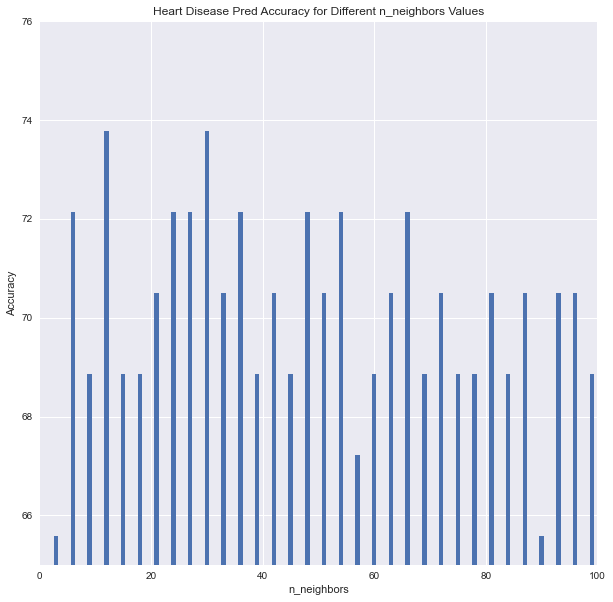

In [34]:
plt.style.use('seaborn')

fig,ax=plt.subplots(figsize=(10,10))
ax.bar(acc.keys(),acc.values())
ax.set(title='Heart Disease Pred Accuracy for Different n_neighbors Values',
      xlabel='n_neighbors',
      ylabel='Accuracy',
      ylim=(65,76),
      xlim=(0,100));


In [33]:
acc

{3: 65.57377049180327,
 6: 72.1311475409836,
 9: 68.85245901639344,
 12: 73.77049180327869,
 15: 68.85245901639344,
 18: 68.85245901639344,
 21: 70.49180327868852,
 24: 72.1311475409836,
 27: 72.1311475409836,
 30: 73.77049180327869,
 33: 70.49180327868852,
 36: 72.1311475409836,
 39: 68.85245901639344,
 42: 70.49180327868852,
 45: 68.85245901639344,
 48: 72.1311475409836,
 51: 70.49180327868852,
 54: 72.1311475409836,
 57: 67.21311475409836,
 60: 68.85245901639344,
 63: 70.49180327868852,
 66: 72.1311475409836,
 69: 68.85245901639344,
 72: 70.49180327868852,
 75: 68.85245901639344,
 78: 68.85245901639344,
 81: 70.49180327868852,
 84: 68.85245901639344,
 87: 70.49180327868852,
 90: 65.57377049180327,
 93: 70.49180327868852,
 96: 70.49180327868852,
 99: 68.85245901639344}

In [36]:
best_n_neighbor=max(acc,key=lambda x:acc[x])
best_n_neighbor

12

In [37]:
np.random.seed(12)

nbrs=KNeighborsClassifier(n_neighbors=best_n_neighbor)
nbrs.fit(X_train,y_train)

print(f'Best Score with KNN is with {best_n_neighbor} as n_neighbors that is {nbrs.score(X_test,y_test)*100:.2f}%')

Best Score with KNN is with 12 as n_neighbors that is 73.77%


Model is working but lets see if score can be improved

In [53]:
#Map says to try SVC
from sklearn.svm import SVC

np.random.seed(42)

reg_c=np.arange(0.1,1.1,0.1)
svc_acc={}

for i in reg_c:
    svc_clf=SVC(C=i)
    svc_clf.fit(X_train,y_train)
    svc_acc[i]=svc_clf.score(X_test,y_test)*100
    print(f'Accuracy of SVC with {i} as regularization value is {svc_acc[i]*100:.2f}%')
    print()

Accuracy of SVC with 0.1 as regularization value is 5245.90%

Accuracy of SVC with 0.2 as regularization value is 5245.90%

Accuracy of SVC with 0.30000000000000004 as regularization value is 5245.90%

Accuracy of SVC with 0.4 as regularization value is 5737.70%

Accuracy of SVC with 0.5 as regularization value is 6229.51%

Accuracy of SVC with 0.6 as regularization value is 6721.31%

Accuracy of SVC with 0.7000000000000001 as regularization value is 6557.38%

Accuracy of SVC with 0.8 as regularization value is 6885.25%

Accuracy of SVC with 0.9 as regularization value is 7049.18%

Accuracy of SVC with 1.0 as regularization value is 7049.18%



In [54]:
svc_acc

{0.1: 52.459016393442624,
 0.2: 52.459016393442624,
 0.30000000000000004: 52.459016393442624,
 0.4: 57.377049180327866,
 0.5: 62.295081967213115,
 0.6: 67.21311475409836,
 0.7000000000000001: 65.57377049180327,
 0.8: 68.85245901639344,
 0.9: 70.49180327868852,
 1.0: 70.49180327868852}

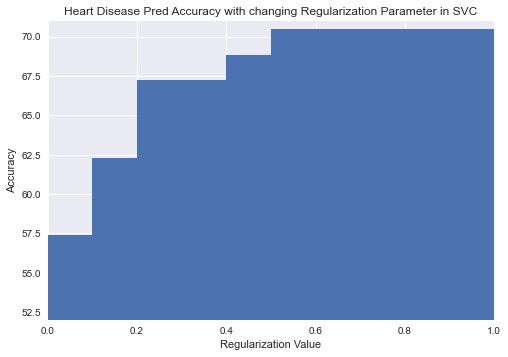

In [59]:
max_acc=int(svc_acc[max(svc_acc,key=lambda x:svc_acc[x])])+1
min_acc=int(svc_acc[min(svc_acc,key=lambda x:svc_acc[x])])
key_max_acc=max(svc_acc,key=lambda x:svc_acc[x])

fig,ax=plt.subplots()
ax.bar(svc_acc.keys(),svc_acc.values())
ax.set(title='Heart Disease Pred Accuracy with changing Regularization Parameter in SVC',
      xlabel='Regularization Value',
      ylabel='Accuracy',
      xlim=(0,1),
      ylim=(min_acc,max_acc));

In [62]:
np.random.seed(42)

svc_clf=SVC(C=key_max_acc)
svc_clf.fit(X_train,y_train)
print(f'Accuracy score with best value for Regularization Parameter i.e. {key_max_acc} is {svc_clf.score(X_test,y_test)*100:.2f}%')

Accuracy score with best value for Regularization Parameter i.e. 0.9 is 70.49%


### WE TRIED 3 MODELS :-

    1. LinearSVC : Was not working properly
    2. KNN : Tried it with the different vales of n_neighbors and found the best one
    3. SVC : Tried it with the different vales of Regularization Parameter(c) and found the best one